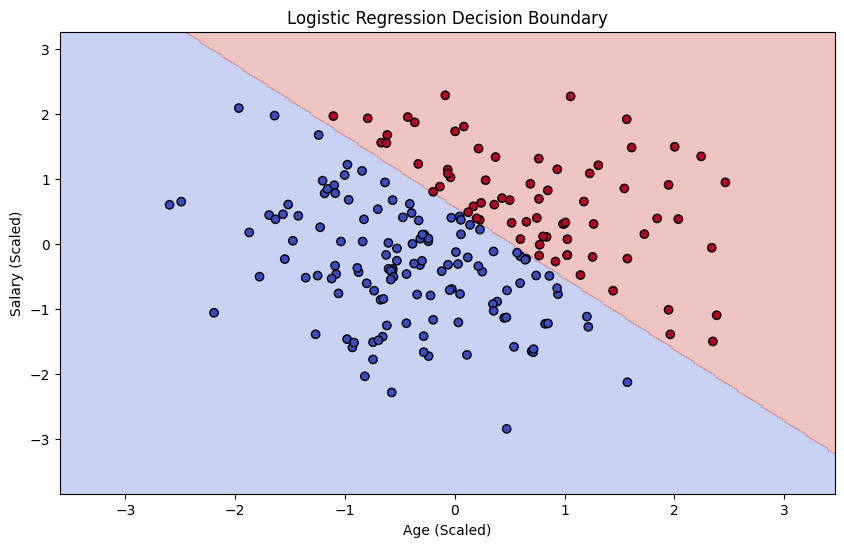

Accuracy: 100.00%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Generate Synthetic Data
# Let's say: Feature 1 = Age, Feature 2 = Salary
np.random.seed(0)
X = np.random.randn(200, 2)
# Create a pattern: People with high age AND high salary bought it (Class 1)
# The condition is roughly: Age + Salary > 0.5
y = (X[:, 0] + X[:, 1] > 0.5).astype(int)

# 2. Scale the Data (IMPORTANT for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train Model
log_reg = LogisticRegression()
log_reg.fit(X_scaled, y)

# 4. Visualizing the Decision Boundary
# This code creates a grid of points to color the background
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm') # Background colors
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap='coolwarm', label='Data Points')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Age (Scaled)")
plt.ylabel("Salary (Scaled)")
plt.show()

# 5. Check Accuracy
print(f"Accuracy: {accuracy_score(y, log_reg.predict(X_scaled)) * 100:.2f}%")

***Because Logistic Regression is a linear classifier, it can only separate data that is Linearly Separable. It cannot solve problems where the data looks like a circle or a donut.***